Homework 1 Sehyun Cho - CAP4612 

In [375]:
'''
Sehyun Cho
CAP4612
09/10/2022
'''

#Import libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn


#Read csv file
csv = pd.read_csv("lncRNA_5_Cancers.csv")

In [376]:
# Test csv reading
csv

,Ensembl_ID,ENSG00000005206.15,ENSG00000083622.8,ENSG00000088970.14,ENSG00000099869.7,ENSG00000100181.20,ENSG00000104691.13,ENSG00000115934.11,ENSG00000117242.7,ENSG00000118412.11,...,ENSGR0000223511.4,ENSGR0000223571.4,ENSGR0000226179.4,ENSGR0000230542.4,ENSGR0000234622.4,ENSGR0000236017.6,ENSGR0000236871.5,ENSGR0000237531.4,ENSGR0000270726.4,Class
0,TCGA-3Z-A93Z-01A,3.390813,0.0,2.918265,0.014832,0.341984,2.194036,0.000000,1.569750,1.159419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
1,TCGA-6D-AA2E-01A,3.144547,0.0,1.961410,0.047186,1.677598,2.605298,0.000000,1.180583,1.127571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
2,TCGA-A3-3306-01A,2.484817,0.0,2.896470,0.000000,0.087972,3.176764,0.000000,1.690582,1.161923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
3,TCGA-A3-3307-01A,2.789058,0.0,2.439171,0.022316,0.502293,2.679842,0.000000,1.659525,1.463067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
4,TCGA-A3-3308-01A,3.258763,0.0,1.941660,0.050283,0.098625,2.841588,0.000000,1.296678,1.728514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,TCGA-MK-A4N6-01A,1.996951,0.0,1.451191,0.000000,2.138038,2.059462,0.000000,0.868904,1.543343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,THCA
2525,TCGA-MK-A4N7-01A,2.570807,0.0,2.205505,0.000000,2.323751,2.717458,0.000000,1.431395,1.648935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,THCA
2526,TCGA-MK-A4N9-01A,3.022679,0.0,2.595927,0.000000,1.972459,2.871708,0.020087,1.320328,1.555023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,THCA
2527,TCGA-MK-A84Z-01A,3.139110,0.0,2.005856,0.000000,1.802198,2.570089,0.000000,2.023486,1.344469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,THCA


In [377]:
# Filter column data from the second to the (last-1) column
features = csv.iloc[:,1:-1]

# Test filtered it well
features

,ENSG00000005206.15,ENSG00000083622.8,ENSG00000088970.14,ENSG00000099869.7,ENSG00000100181.20,ENSG00000104691.13,ENSG00000115934.11,ENSG00000117242.7,ENSG00000118412.11,ENSG00000122043.9,...,ENSGR0000185203.10,ENSGR0000223511.4,ENSGR0000223571.4,ENSGR0000226179.4,ENSGR0000230542.4,ENSGR0000234622.4,ENSGR0000236017.6,ENSGR0000236871.5,ENSGR0000237531.4,ENSGR0000270726.4
0,3.390813,0.0,2.918265,0.014832,0.341984,2.194036,0.000000,1.569750,1.159419,0.028200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.144547,0.0,1.961410,0.047186,1.677598,2.605298,0.000000,1.180583,1.127571,0.131274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.484817,0.0,2.896470,0.000000,0.087972,3.176764,0.000000,1.690582,1.161923,0.109720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.789058,0.0,2.439171,0.022316,0.502293,2.679842,0.000000,1.659525,1.463067,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.258763,0.0,1.941660,0.050283,0.098625,2.841588,0.000000,1.296678,1.728514,0.019417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,1.996951,0.0,1.451191,0.000000,2.138038,2.059462,0.000000,0.868904,1.543343,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2525,2.570807,0.0,2.205505,0.000000,2.323751,2.717458,0.000000,1.431395,1.648935,0.025819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2526,3.022679,0.0,2.595927,0.000000,1.972459,2.871708,0.020087,1.320328,1.555023,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2527,3.139110,0.0,2.005856,0.000000,1.802198,2.570089,0.000000,2.023486,1.344469,0.104932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [378]:
# Set x for the values of the above table
x = features.values

# Set y for the 'Class' column values
y = csv.loc[:, ['Class']].values

# Fit to data, then transform it!
X = StandardScaler().fit_transform(x,y)

In [379]:
# call the PCA function to reduce to two dimension
pca = PCA(n_components= 2)

# set the components
principalComponents = pca.fit_transform(x)

# set the data frame as two data table PC1 and PC2
principalDataFrame = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2'])

# test the PC1 and PC2
principalDataFrame

,PC1,PC2
0,-17.864791,15.904503
1,-8.682791,9.634450
2,-20.860309,16.121578
3,-25.767978,19.649743
4,-21.025951,13.430290
...,...,...
2524,-2.416017,-3.437234
2525,3.469989,4.820638
2526,5.365098,9.652960
2527,6.445645,10.172874


In [380]:
# test few class table
csv[['Class']].head()

,Class
0,KIRC
1,KIRC
2,KIRC
3,KIRC
4,KIRC


In [381]:
# Concat the PC1 PC2 values to the class labels(to make it one)
finalDataFrame = pd.concat([principalDataFrame, csv[['Class']]], axis = 1)

# Test final dataframe
finalDataFrame

,PC1,PC2,Class
0,-17.864791,15.904503,KIRC
1,-8.682791,9.634450,KIRC
2,-20.860309,16.121578,KIRC
3,-25.767978,19.649743,KIRC
4,-21.025951,13.430290,KIRC
...,...,...,...
2524,-2.416017,-3.437234,THCA
2525,3.469989,4.820638,THCA
2526,5.365098,9.652960,THCA
2527,6.445645,10.172874,THCA


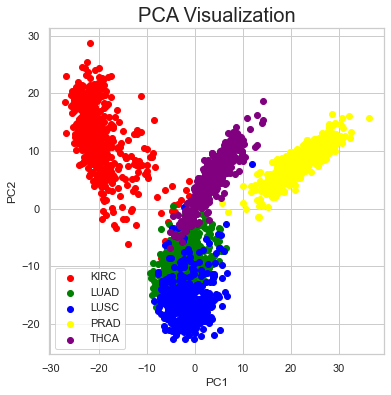

In [382]:
# Figure outline declaration
figure = plt.figure(figsize = (6,6))
pl = figure.add_subplot(1,1,1)
pl.set_xlabel('PC1')
pl.set_ylabel('PC2')
pl.set_title('PCA Visualization', fontsize = 20)

# set the target and set the each target's color
targets = ['KIRC', 'LUAD', 'LUSC', 'PRAD', 'THCA']
colors = ['red', 'green', 'blue', 'yellow', 'purple']

# Use for loop to read each targets and colors to the graph
for target, color in zip(targets, colors):
    indices = finalDataFrame['Class'] == target
    pl.scatter(finalDataFrame.loc[indices, 'PC1'],
               finalDataFrame.loc[indices, 'PC2'],
               c = color)


# add legend on axes
pl.legend(targets)

<AxesSubplot:xlabel='Class', ylabel='PC1'>

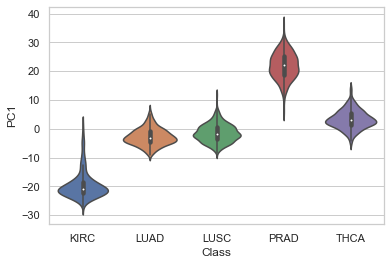

In [383]:
# For the Violin plots
# x = label, y = PC1 or PC2
seaborn.set(style ='whitegrid')
    
# One violin plot for PC1
seaborn.violinplot(x = finalDataFrame['Class'], y = principalDataFrame['PC1'], data = principalDataFrame)

<AxesSubplot:xlabel='Class', ylabel='PC2'>

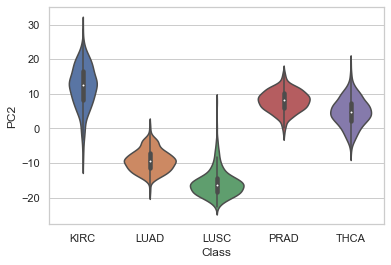

In [384]:
# One violin plot for PC2
seaborn.violinplot(x = finalDataFrame['Class'], y = principalDataFrame['PC2'], data= principalDataFrame)

In [390]:
# For the t-SNE function setup
# two dimensional, verbose parameter for progress of t-SNE
tsne = TSNE(n_components = 2, verbose = 1)

# fit output
tsne_fit = tsne.fit_transform(x) 

c:\Users\takem\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\takem\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2529 samples in 0.070s...
[t-SNE] Computed neighbors for 2529 samples in 2.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2529
[t-SNE] Computed conditional probabilities for sample 2000 / 2529
[t-SNE] Computed conditional probabilities for sample 2529 / 2529
[t-SNE] Mean sigma: 8.132460
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.670509
[t-SNE] KL divergence after 1000 iterations: 1.280919


In [391]:
# Collect data into the data frames
principalDataFrame['tsne_1'] = tsne_fit[:,0]
principalDataFrame['tsne_2'] = tsne_fit[:,1]

[Text(0.5, 1.0, 't-SNE plot graph')]

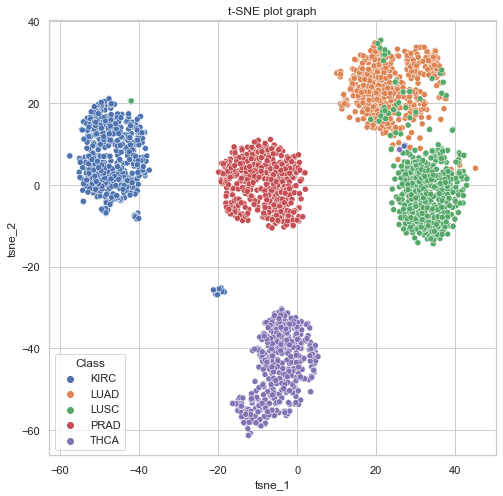

In [392]:
# create scatter plot for t-SNE
# Having heuristic result
plt.figure(figsize=(8,8))
seaborn.scatterplot(
    x = 'tsne_1', y ='tsne_2',
    hue = finalDataFrame['Class'],
    data = principalDataFrame,
).set(title="t-SNE plot graph")

<AxesSubplot:xlabel='Class', ylabel='tsne_1'>

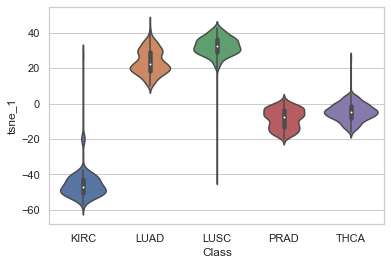

In [393]:
# One violin plot for t-SNE_1
seaborn.violinplot(x = finalDataFrame['Class'], y = 'tsne_1', data = principalDataFrame)

<AxesSubplot:xlabel='Class', ylabel='tsne_2'>

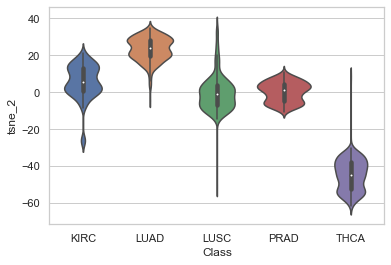

In [394]:
# One violin plot for t-SNE_2
seaborn.violinplot(x = finalDataFrame['Class'], y = principalDataFrame['tsne_2'], data = principalDataFrame)